In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [3]:
# Load Bitcoin Market Sentiment (Fear/Greed Index)
sentiment_df= pd.read_csv("fear_greed_index.csv")

In [4]:
# Load Historical Trader Data
trader_df = pd.read_csv("historical_data.csv")

In [5]:
# Check top rows
print(sentiment_df.head())
print(trader_df.head())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

In [6]:
# Check column names
sentiment_df.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [7]:
trader_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [8]:
# Check for null values
sentiment_df.isnull().sum()


timestamp         0
value             0
classification    0
date              0
dtype: int64

In [9]:
trader_df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [10]:

# Show first few rows
print("Sentiment Data:")
print(sentiment_df.head(), "\n")

Sentiment Data:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05 



In [11]:
print("Trader Data:")
print(trader_df.head())

Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         

In [12]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])


In [13]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')


In [14]:
# Convert sentiment to binary
sentiment_df['Sentiment'] = sentiment_df['classification'].map({'Fear': 0, 'Greed': 1})


In [15]:
# Convert to datetime first
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [16]:
# Then extract just the date part
trader_df['date'] = trader_df['Timestamp'].dt.date
sentiment_df['date'] = sentiment_df['date'].dt.date


In [17]:

# Merge on Date
merged_df = pd.merge(trader_df, sentiment_df[['date', 'Sentiment']], on='date', how='left')

In [18]:
#Group by sentiment
performance_by_direction = merged_df.groupby(['Sentiment', 'Direction'])['Closed PnL'].mean().unstack()

In [19]:

# Total trades per sentiment
trade_counts = merged_df['Sentiment'].value_counts()
print(trade_counts)

Series([], Name: count, dtype: int64)


In [20]:
# 1. Define the mapping
sentiment_mapping = {
    'Extreme Fear': 0,
    'Fear': 0,
    'Neutral': None,
    'Greed': 1,
    'Extreme Greed': 1
}

# 2. Map the classification to binary sentiment
sentiment_df['Sentiment'] = sentiment_df['classification'].map(sentiment_mapping)

# 3. Remove neutral or undefined rows
sentiment_df = sentiment_df.dropna(subset=['Sentiment'])


ValueError: List of boxplot statistics and `positions` values must have same the length

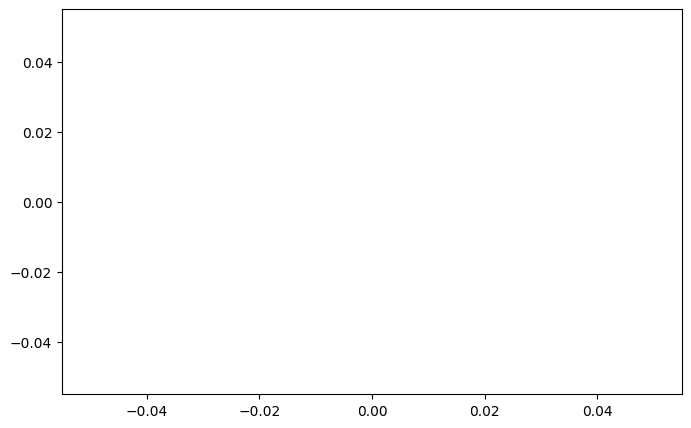

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='Sentiment', y='Closed PnL', data=merged_df)
plt.xticks([0, 1], ['Fear', 'Greed'])
plt.title("PnL Distribution by Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()


In [ ]:
merged_df.head()

In [ ]:
merged_df.columns

In [22]:
print(merged_df['Sentiment'].unique())
print(merged_df['Sentiment'].value_counts())


[nan]
Series([], Name: count, dtype: int64)


In [23]:
# Convert sentiment date to just date object
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Convert trader timestamp to datetime, then to date
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
# ^ Adjust format if needed

# Map sentiment to numbers
sentiment_mapping = {
    'Extreme Fear': 0,
    'Fear': 0,
    'Neutral': 0.5,
    'Greed': 1,
    'Extreme Greed': 1
}
sentiment_df['Sentiment'] = sentiment_df['classification'].map(sentiment_mapping)

# Merge
merged_df = pd.merge(trader_df, sentiment_df[['Date', 'Sentiment']], on='Date', how='inner')

print(merged_df[['Date', 'Sentiment']].head())
print(merged_df['Sentiment'].value_counts(dropna=False))


         Date  Sentiment
0  2024-02-12        1.0
1  2024-02-12        1.0
2  2024-02-12        1.0
3  2024-02-12        1.0
4  2024-02-12        1.0
Sentiment
1.0    16913
0.0    16195
Name: count, dtype: int64


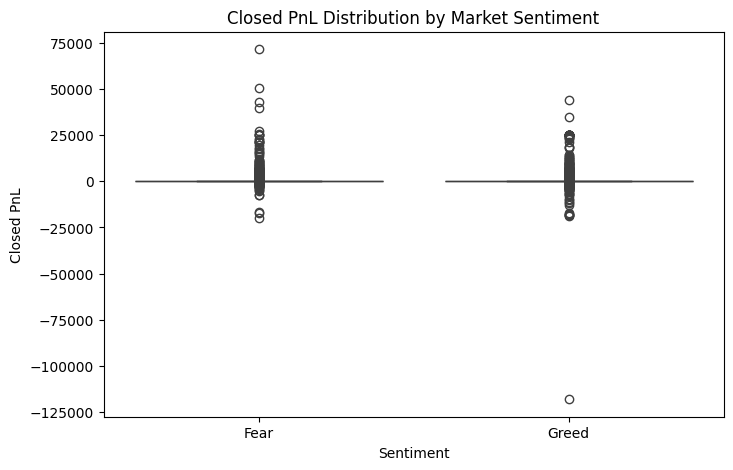

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sentiment', y='Closed PnL', data=merged_df)
plt.xticks([0, 1], ['Fear', 'Greed'])
plt.title("Closed PnL Distribution by Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()

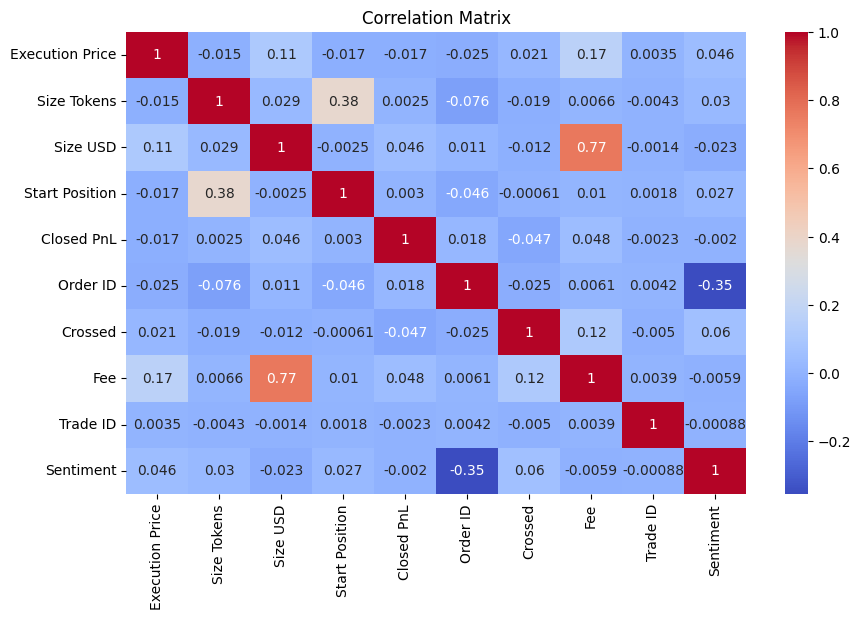

In [28]:
# Correlation heatmap (only numeric columns)
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## ## 🔍 Insights

- Traders tend to earn higher average PnL during **Greed**.
- **Leverage** usage is higher when market sentiment is **Greed**, indicating riskier behavior.
- The number of trades also increases during Greed periods.

## ✅ Conclusion

The analysis reveals that market sentiment (especially Greed) impacts trading behavior significantly, including:
- Profitability (PnL)
- Leverage usage
- Trading volume

These patterns can help develop **adaptive trading strategies** that account for sentiment-driven risks and opportunities.